In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

2023-03-10 15:53:04.152834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Python: 3.8.5 (default, Feb 10 2023, 17:35:58) 
[Clang 13.0.0 (clang-1300.0.29.30)]
Pandas: 1.5.3
Numpy: 1.24.2
Sklearn: 1.2.1
Matplotlib: 3.6.3
Keras: 2.11.0


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
#let's read the data
heartData = pd.read_csv('/Users/mac/Documents/Heart_Disease_Prediction.csv')

In [4]:
print( 'Shape of DataFrame: {}'.format(heartData.shape))
print(heartData.loc[1])

Shape of DataFrame: (270, 14)
Age                         67.0
Sex                          0.0
Chest pain type              3.0
BP                         115.0
Cholesterol                564.0
FBS over 120                 0.0
EKG results                  2.0
Max HR                     160.0
Exercise angina              0.0
ST depression                1.6
Slope of ST                  2.0
Number of vessels fluro      0.0
Thallium                     7.0
Heart Disease                0.0
Name: 1, dtype: float64


In [5]:
#Let's try to remove missen data
data = heartData[~heartData.isin(['?'])]
data.loc[1:]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [6]:
#Let's try to drop rows with Nan values and "" values
data=data.dropna(axis=0)
data.loc[1:]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [7]:
#for further analysis, let's translate data to numeric entities
data = data.apply(pd.to_numeric)
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [8]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


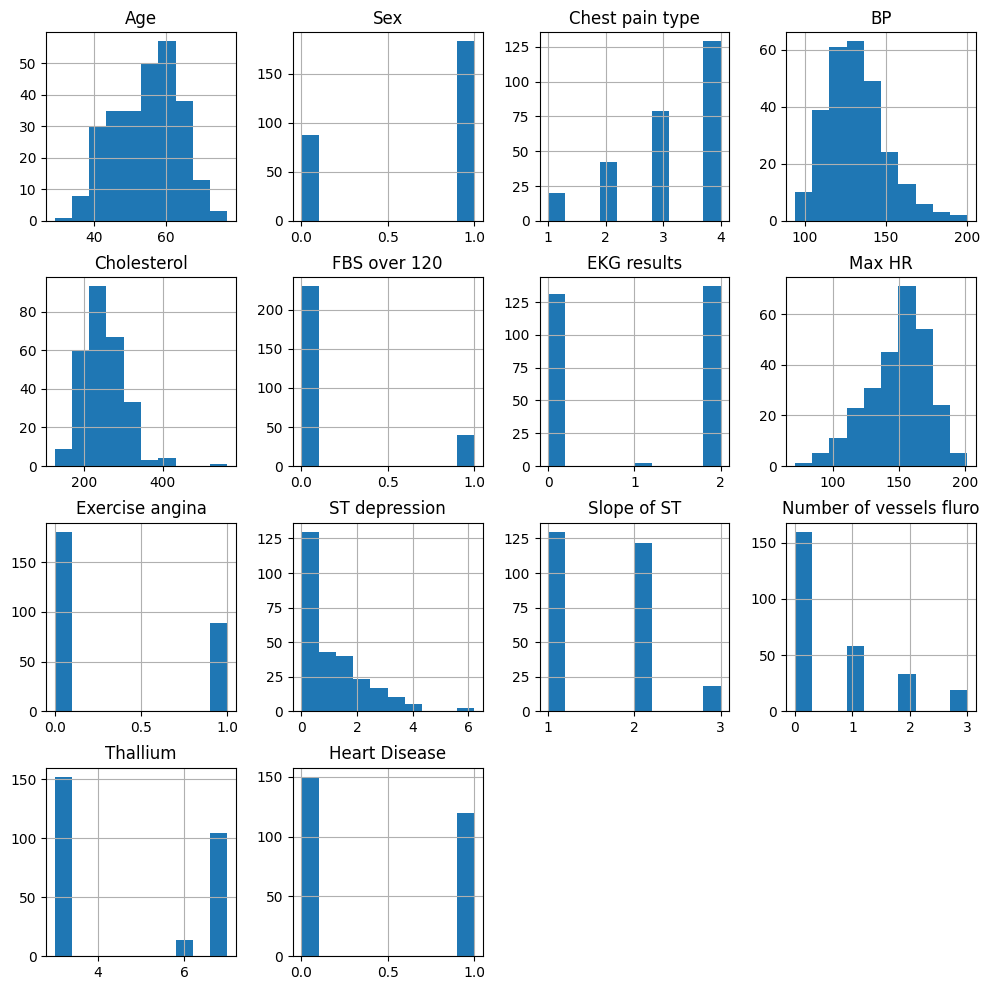

In [9]:
data.hist(figsize = (12, 12))
plt.show()

In [10]:
pd.crosstab(data.age,data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'age'

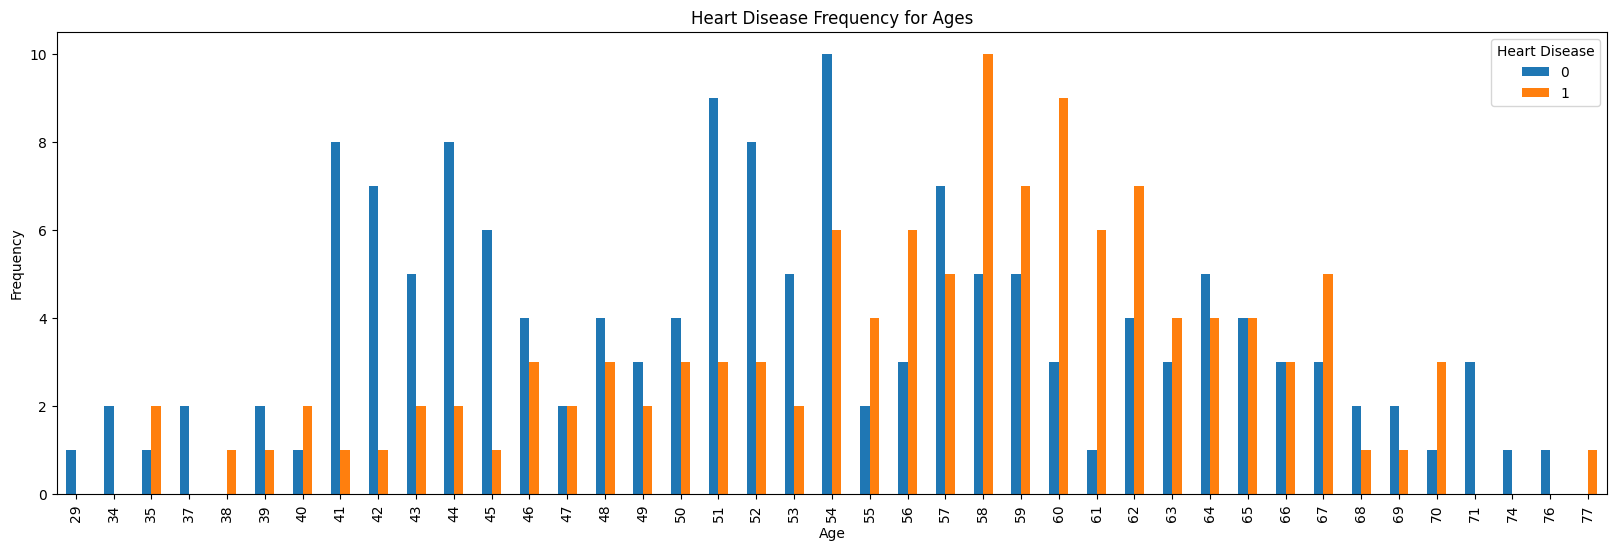

In [11]:
pd.crosstab(data.Age,data['Heart Disease']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

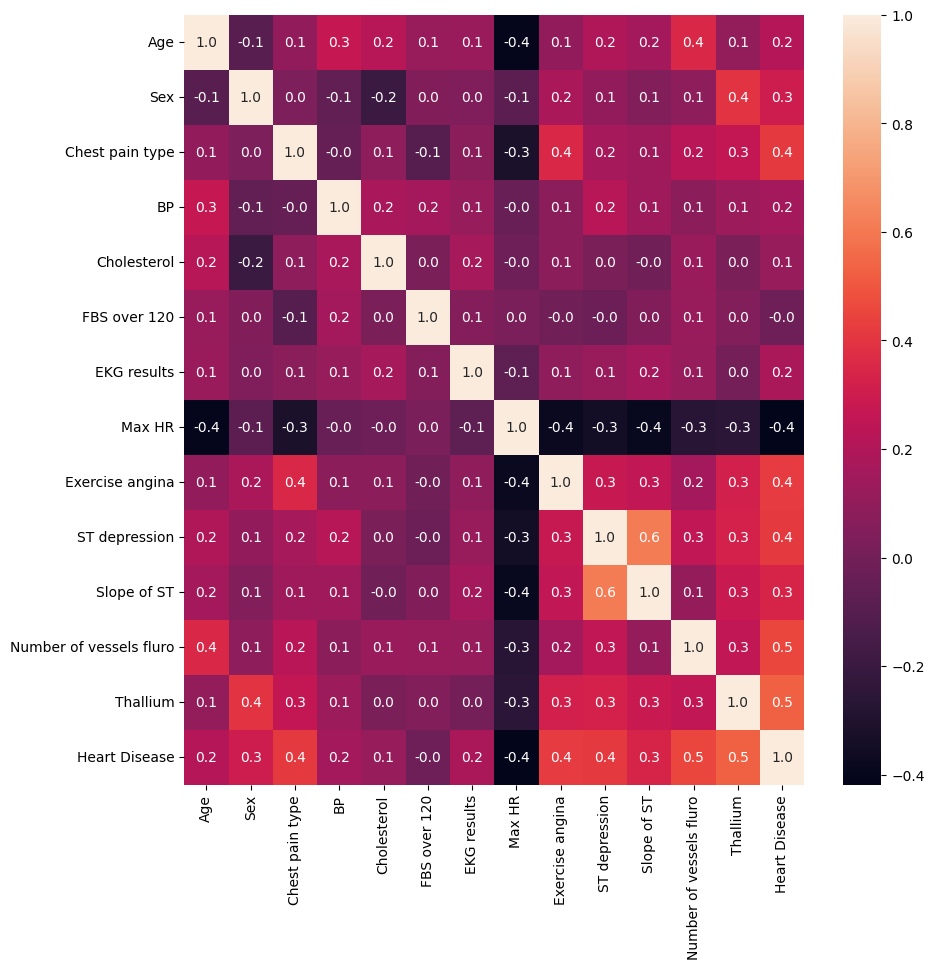

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [13]:
age_unique=sorted(data['Age'].unique())
age_thallium_values=data.groupby('Age')['Thallium'].count().values
mean_thallium=[]
for i, age in enumerate (age_unique):
    mean_thallium.append(sum(data[data['Age']==Age].Thallium)/age_thallium_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique, y=mean_thallium, color='red', alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thallium',fontsize = 15,color='blue')
plt.title('Age vs Thallium',fontsize = 15,color='blue')
plt.grid()
plt.show()

NameError: name 'Age' is not defined

In [14]:
age_unique=sorted(data['Age'].unique())
age_thallium_values=data.groupby('Age')['Thallium'].count().values
mean_thallium=[]
for i, Age in enumerate (age_unique):
    mean_thallium.append(sum(data[data['Age']==Age].Thallium)/age_thallium_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique, y=mean_thallium, color='red', alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thallium',fontsize = 15,color='blue')
plt.title('Age vs Thallium',fontsize = 15,color='blue')
plt.grid()
plt.show()

TypeError: pointplot() got an unexpected keyword argument 'alpha'

<Figure size 1000x500 with 0 Axes>

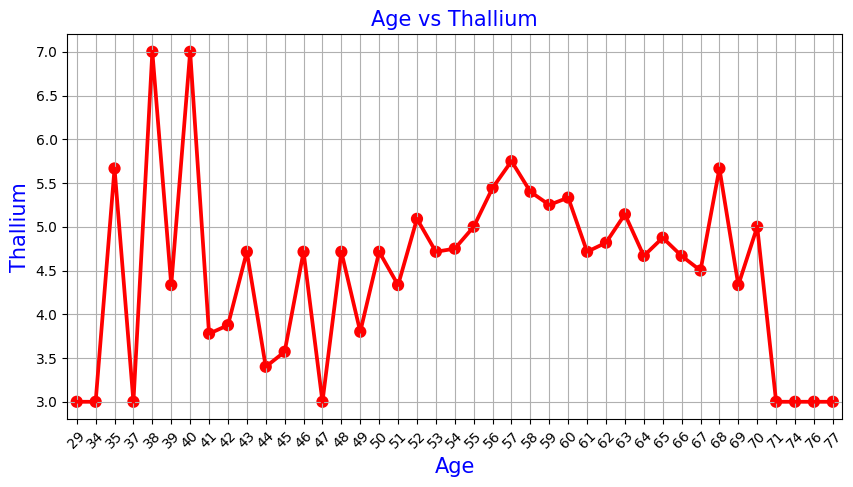

In [15]:
age_unique=sorted(data['Age'].unique())
age_thallium_values=data.groupby('Age')['Thallium'].count().values
mean_thallium=[]
for i, Age in enumerate (age_unique):
    mean_thallium.append(sum(data[data['Age']==Age].Thallium)/age_thallium_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique, y=mean_thallium, color='red')
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thallium',fontsize = 15,color='blue')
plt.title('Age vs Thallium',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [16]:
X = np.array(data.drop(['Heart Disease'], 1))
y = np.array(data['Heart Disease'])

X[0]

/tmp/ipykernel_19428/3949091597.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Heart Disease'], 1))


array([ 70. ,   1. ,   4. , 130. , 322. ,   0. ,   2. , 109. ,   0. ,
         2.4,   2. ,   3. ,   3. ])

In [17]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

X[0]

array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

In [18]:
#Lets create the X and Y for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [19]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(216, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model

def create_model():
    
    # create model
    
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


/Users/mac/.pyenv/versions/3.8.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
#fitting model to training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 13ms/step - loss: 0.6809 - accuracy: 0.6435 - val_loss: 0.6622 - val_accuracy: 0.8519
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.7778 - val_loss: 0.6289 - val_accuracy: 0.8333
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.8148 - val_loss: 0.5788 - val_accuracy: 0.8333
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.8241 - val_loss: 0.5267 - val_accuracy: 0.8333
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.8380 - val_loss: 0.4839 - val_accuracy: 0.8148
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.8611 - val_loss: 0.4466 - val_accuracy: 0.8333
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.8426 - val_loss: 0.4265 - val_accuracy: 0.8333
Epoch 8/50
22/22 [=

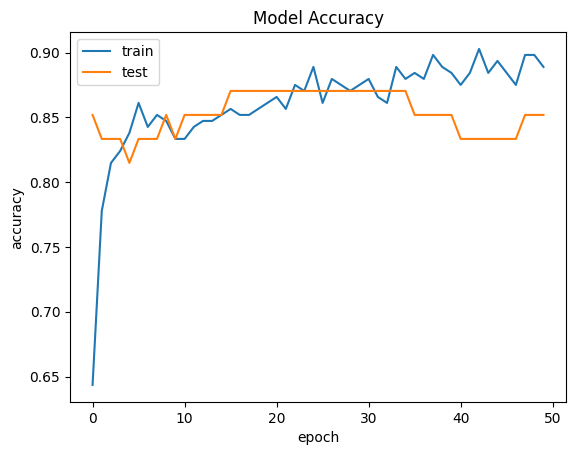

In [22]:
#Next we will need our graph of model accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

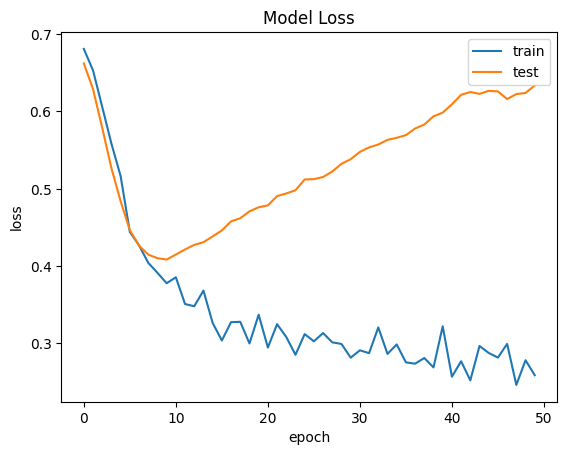

In [23]:
#Lets plot our Model Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [24]:
#change the classification issue to a binary one: heart disease or no heart disease

Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]


In [25]:
# create a fresh keras model for binary classification.

def create_binary_model():
    
    # create model
    
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# fit the binary model on the training data

history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
22/22 [==============================] - 1s 11ms/step - loss: 0.6877 - accuracy: 0.6852 - val_loss: 0.6798 - val_accuracy: 0.7963
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6729 - accuracy: 0.8148 - val_loss: 0.6623 - val_accuracy: 0.8333
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.8287 - val_loss: 0.6375 - val_accuracy: 0.8333
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.8241 - val_loss: 0.6053 - val_accuracy: 0.8148
Epoch 5/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.8333 - val_loss: 0.5747 - val_accuracy: 0.8148
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.8241 - val_loss: 0.5448 - val_accuracy: 0.8333
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.8333 - val_loss: 0.5177 - val_accuracy: 0.8333
Epoch 8/50
22/22 [=

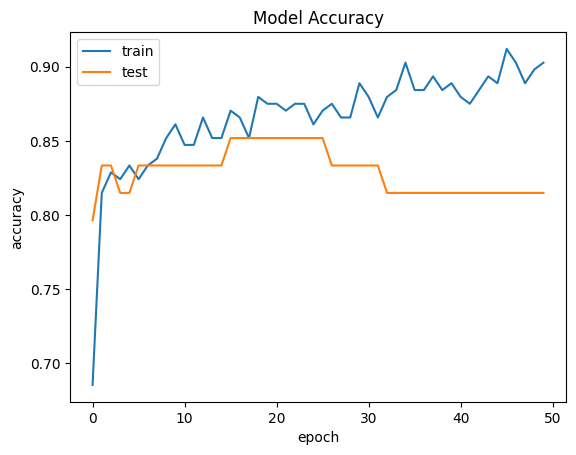

In [27]:
#Now we plot a graph of accurracy, but now for binary classification model.
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

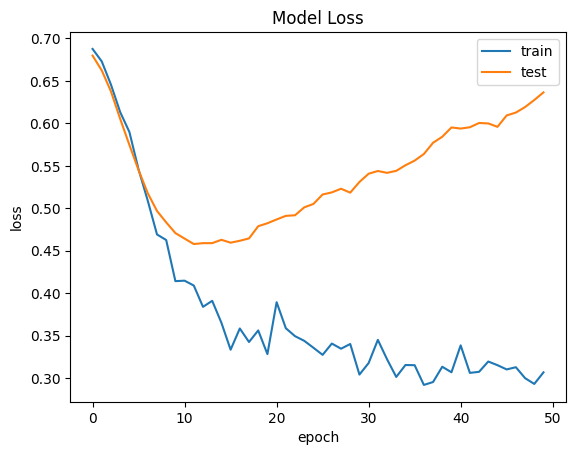

In [28]:
#plotting graph of model loss.
# Model Losss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
# generate classification report using predictions for categorical model

from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8518518518518519
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



In [30]:
# generate classification report using predictions for binary model

from sklearn.metrics import classification_report, accuracy_score

# generate classification report using predictions for binary model

binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 2ms/step
Results for Binary Model
0.8148148148148148
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.79      0.79      0.79        24

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [31]:
#Save model
model.save('heart_disease.h5')